In [1]:
import numpy as np
import json 
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
# number of training examples for the training set 
numTraining = []
numTest = []
prefix = "/Users/aysjajohnson/Desktop/ARC-master/data/training/"
files = os.listdir(prefix)
for elem in files:
    if elem == '.DS_Store':
        continue
    else:
        with open(prefix + elem, 'r') as f:
            task = json.load(f)
            numTraining.append(len(task["train"]))
            numTest.append(len(task["test"]))

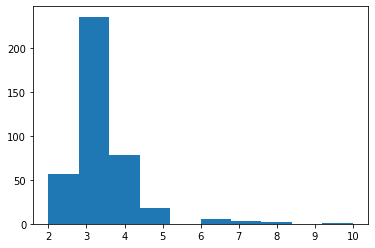

In [3]:
plt.hist(numTraining,10)
plt.show()

In [4]:
df = pd.DataFrame(numTraining)

In [5]:
df[0].value_counts()

3     236
4      78
2      57
5      18
6       5
7       3
8       2
10      1
Name: 0, dtype: int64

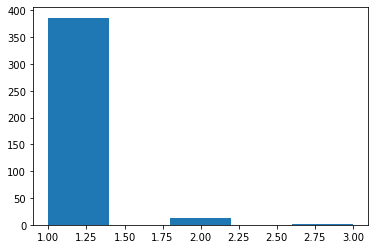

In [6]:
plt.hist(numTest,5)
plt.show()

In [7]:
df = pd.DataFrame(numTest)
df[0].value_counts()

1    386
2     12
3      2
Name: 0, dtype: int64

In [8]:
# number of grids for which input and output differ in size
sizeMatch = []
dif = []
for elem in files:
    if elem == '.DS_Store':
        continue
    else:
        with open(prefix + elem, 'r') as f:
            task = json.load(f)
            inputGrid = np.asarray(task["train"][0]["input"])
            outputGrid = np.asarray(task["train"][0]["output"])
            sizeMatch.append(inputGrid.shape == outputGrid.shape)
            if inputGrid.shape != outputGrid.shape:
                dif.append((np.abs((inputGrid.shape[0]*inputGrid.shape[1])-(outputGrid.shape[0]*outputGrid.shape[1]))))

In [9]:
df = pd.DataFrame(sizeMatch)
df[0].value_counts()

True     262
False    138
Name: 0, dtype: int64

In [10]:
print(sorted(dif))

[6, 6, 6, 7, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 12, 12, 12, 12, 12, 16, 16, 16, 16, 16, 18, 18, 18, 20, 20, 20, 20, 21, 21, 21, 21, 24, 24, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 30, 30, 32, 33, 35, 36, 40, 40, 40, 44, 45, 46, 47, 48, 48, 50, 56, 63, 65, 66, 72, 72, 72, 72, 72, 72, 72, 72, 75, 75, 76, 79, 80, 85, 91, 91, 91, 91, 91, 92, 95, 96, 102, 104, 107, 112, 112, 115, 118, 120, 121, 135, 140, 141, 144, 153, 160, 163, 166, 172, 187, 194, 204, 207, 217, 220, 221, 231, 234, 247, 255, 264, 300, 303, 304, 314, 341, 345, 349, 370, 396, 432, 435, 471, 527, 551, 558, 596, 832, 885]


### Get list of ARC training tasks with two test inputs for exclusion and a list of tasks with three or fewer training examples with grid sizes less than 10x10

In [11]:
def grid_sizes(task_):
    gs = []
    for grid in task_:
        gs.append(len(grid["input"]))
        gs.append(len(grid["input"][0]))
        gs.append(len(grid["output"]))
        gs.append(len(grid["output"][0]))
    return gs

In [12]:
# create a list for the training set 
test_2 = []
train_3 = []
prefix = "/Users/aysjajohnson/Desktop/ARC-master/data/training/"
files = os.listdir(prefix)
for elem in files:
    if elem == '.DS_Store':
        continue
    else:
        with open(prefix + elem, 'r') as f:
            task = json.load(f)
            if len(task["test"]) > 1:
                test_2.append(elem)
            if len(task["train"]) <= 3 and np.all(list(map(lambda x: x <= 10, grid_sizes(task["train"])))):
                train_3.append(elem)

In [13]:
print(test_2, train_3)
print(len(train_3))

['44f52bb0.json', '25ff71a9.json', 'd5d6de2d.json', '239be575.json', 'dc433765.json', 'ff28f65a.json', 'e9614598.json', 'bda2d7a6.json', '27a28665.json', 'd4469b4b.json', '794b24be.json', '3428a4f5.json', '53b68214.json', 'dae9d2b5.json'] ['a699fb00.json', '23581191.json', 'f9012d9b.json', '4258a5f9.json', 'bdad9b1f.json', '8403a5d5.json', '6e19193c.json', '77fdfe62.json', 'd037b0a7.json', '93b581b8.json', 'd2abd087.json', '017c7c7b.json', '28bf18c6.json', 'c3e719e8.json', 'f8c80d96.json', '5c0a986e.json', '49d1d64f.json', '1f876c06.json', 'b60334d2.json', '6c434453.json', 'ded97339.json', '5614dbcf.json', '6150a2bd.json', 'e9afcf9a.json', 'd364b489.json', '2013d3e2.json', '2281f1f4.json', '68b16354.json', 'a78176bb.json', 'a5f85a15.json', '539a4f51.json', 'e179c5f4.json', 'd13f3404.json', '6e82a1ae.json', '7ddcd7ec.json', 'db3e9e38.json', '8f2ea7aa.json', 'cbded52d.json', '8d510a79.json', 'f25ffba3.json', 'ddf7fa4f.json', '3906de3d.json', 'e3497940.json', '46442a0e.json', 'd6ad076f.js

In [14]:
import shutil

for task in train_3:
    original = r'/Users/aysjajohnson/Desktop/ARC/data/training/' + task
    target = r'/Users/aysjajohnson/Desktop/ARC/data/training_exp/' + task
    shutil.copyfile(original, target)

In [ ]:
possibilities = ['1b60fb0c.json','1caeab9d.json','1e0a9b12.json','1f876c06.json','1fad071e.json','3af2c5a8.json',\
                '6c434453.json','6e82a1ae.json','7c008303.json','7fe24cdd.json','8be77c9e.json']
['m','m','m','e','easy for humans, hard for machines','m']